# CUSTOMER CHURN PREDICTION

## Concept

> Customer churn occurs when customers stop using a company's product or service. Predicting churn helps businesses minimize revenue loss, enhance service quality, optimize marketing strategies, and improve customer loyalty.

---

## Approach to Predicting Churn

**Using data analytics and machine learning, the process includes:**

1. **Data Collection**: Gathering transaction history, customer behavior, demographics, and feedback.
2. **Data Preprocessing**: Cleaning, converting, and normalizing data.
3. **Model Selection**: Common models include Logistic Regression, Random Forest, Gradient Boosting (XGBoost, LightGBM), and Deep Learning.
4. **Model Evaluation**: Using metrics like Accuracy, Precision & Recall, F1-score, and AUC-ROC.
5. **Deployment & Monitoring**: Implementing, monitoring, and updating models while integrating AI into marketing strategies.

---


### 1. Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns   
from sklearn.model_selection import train_test_split    
from sklearn.linear_model import LinearRegression   
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE 
from sklearn.calibration import LabelEncoder
import pickle



### 2. Data Collection & Cleaning


In [2]:
customer = pd.read_csv('./data/raw/customer-churn.csv')
customer.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
customer.info()
customer.isnull().sum()
customer.drop(columns=["customerID"],inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
customer["TotalCharges"] = customer["TotalCharges"].replace(" ",0.0).astype(float)

### 3. EDA


In [5]:
customer.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


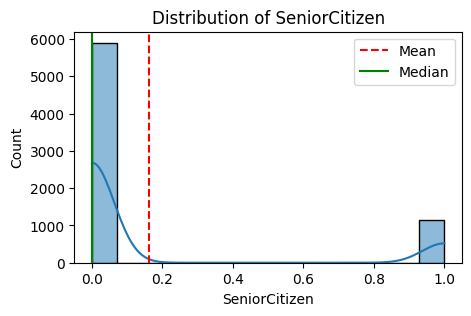

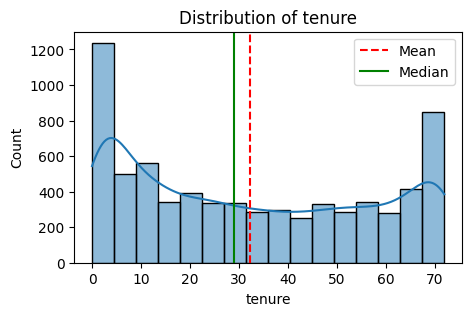

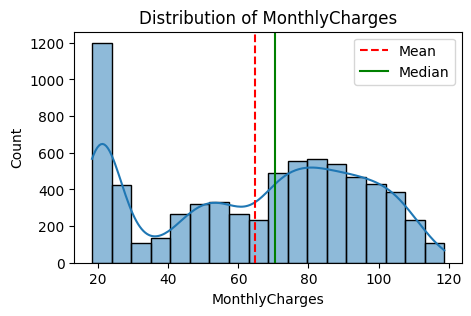

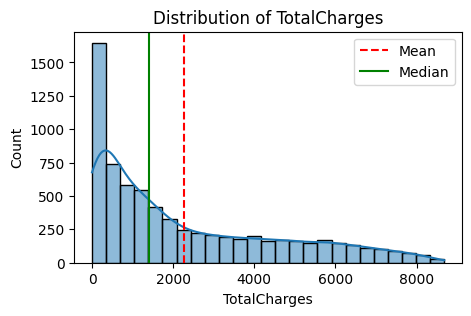

In [6]:
from src.plots import plot_histogram, plot_boxplot
numeric_cols = customer.select_dtypes(include=['number','float64']).columns
for col in numeric_cols:
    plot_histogram(customer, col)

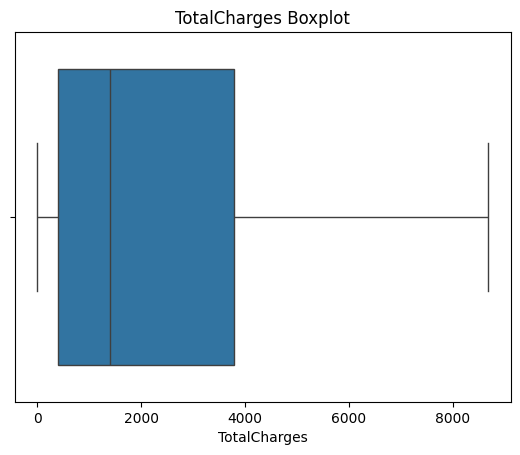

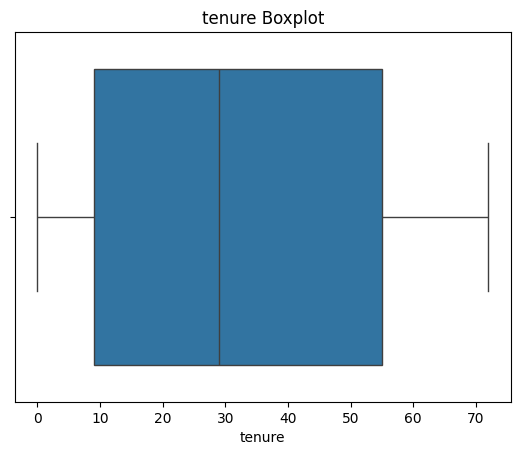

In [7]:
plot_boxplot(customer, "TotalCharges")
plot_boxplot(customer, "tenure")



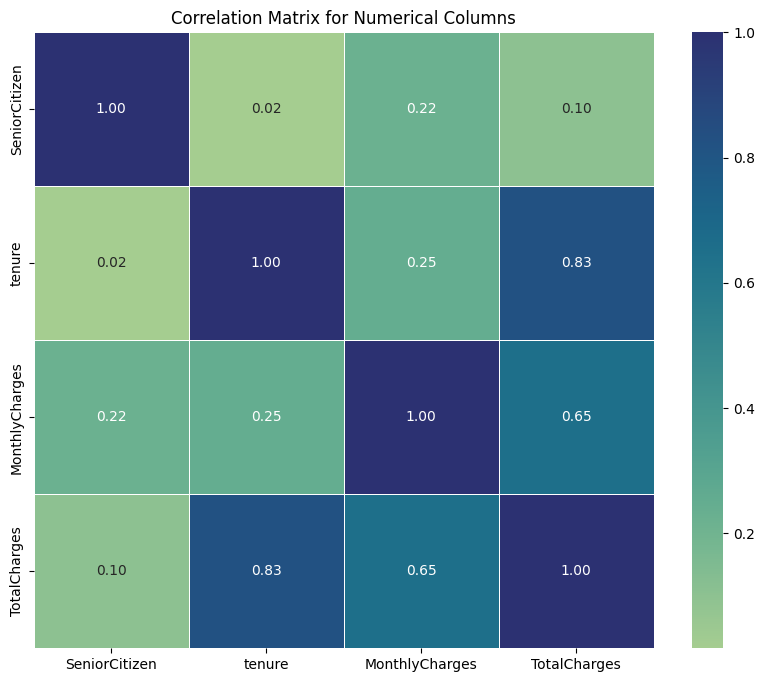

In [8]:
# Tính toán ma trận tương quan
correlation_matrix = customer[numeric_cols].corr()

# Vẽ biểu đồ nhiệt (heatmap) để trực quan hóa ma trận tương quan
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='crest', linewidths=0.5, fmt=".2f")
plt.title('Correlation Matrix for Numerical Columns')
plt.show()

In [9]:
object_cols = customer.select_dtypes(include='object').columns.to_list()
for col in customer.columns:
    print(f'{col}: {customer[col].unique()}')


gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: ['Yes' 'No']
Dependents: ['No' 'Yes']
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService: ['No' 'Yes']
MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: ['Yes' 'No']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalChar

> SeniorCitizen HAVE A OBJECT TYPE


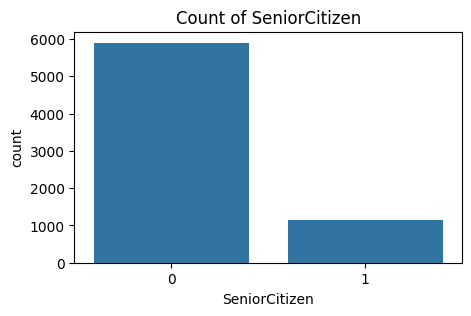

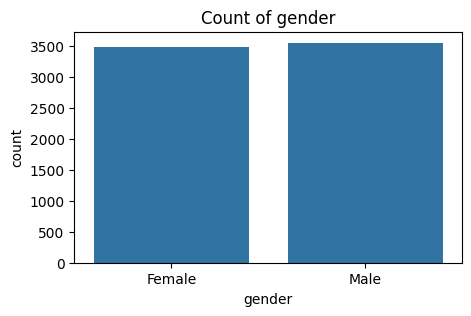

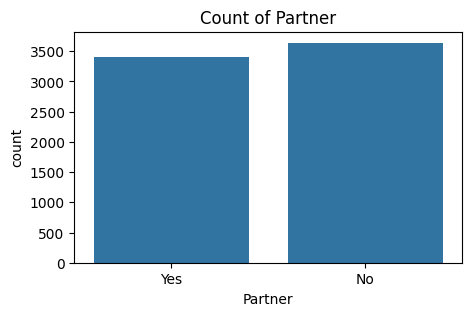

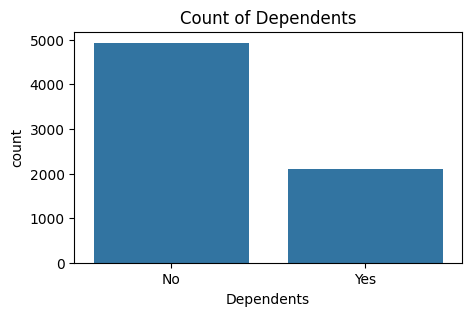

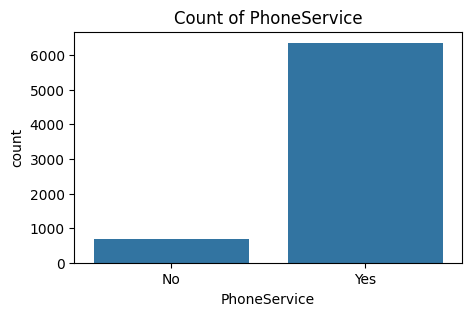

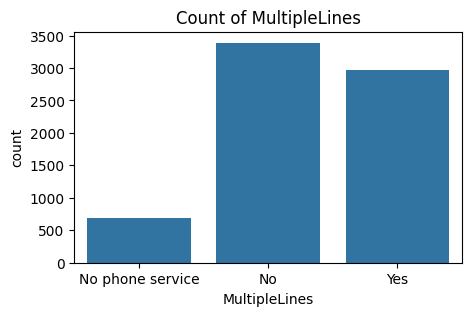

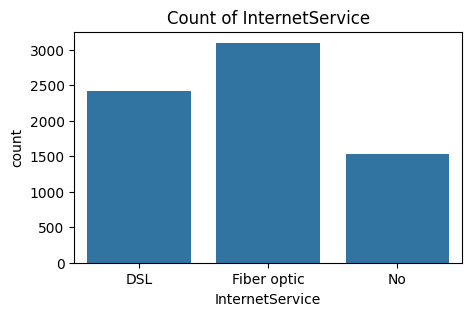

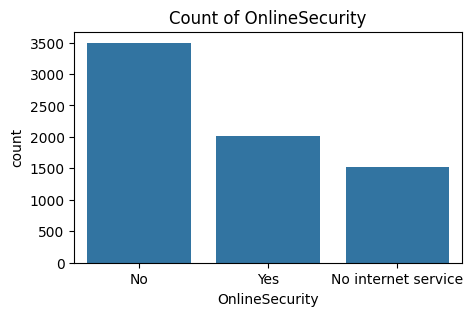

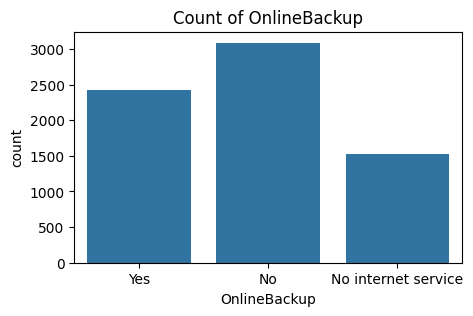

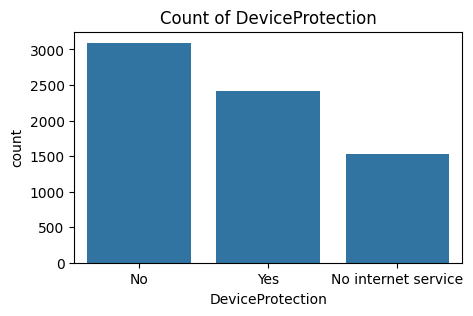

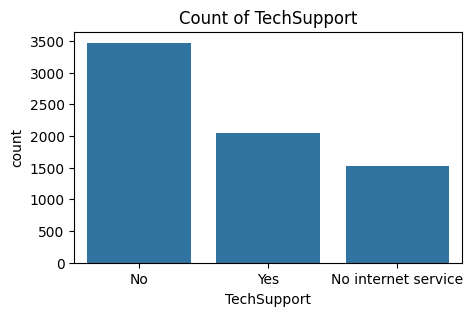

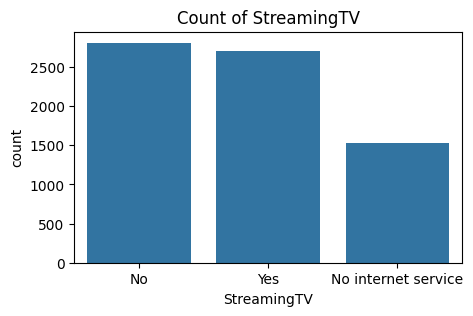

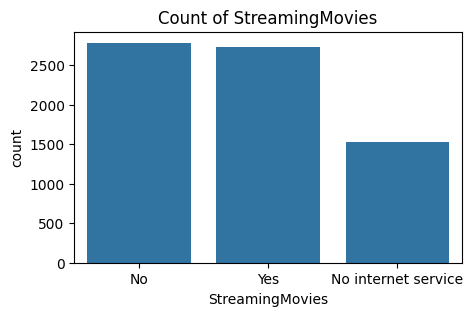

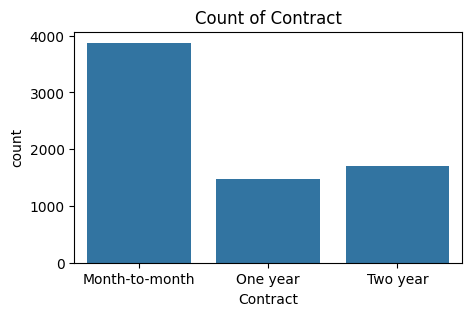

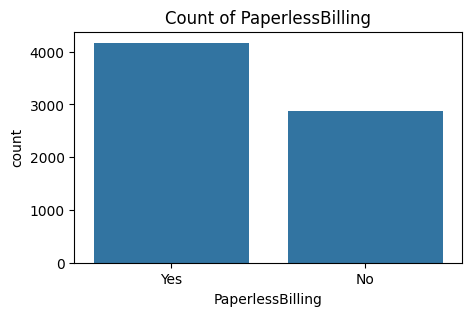

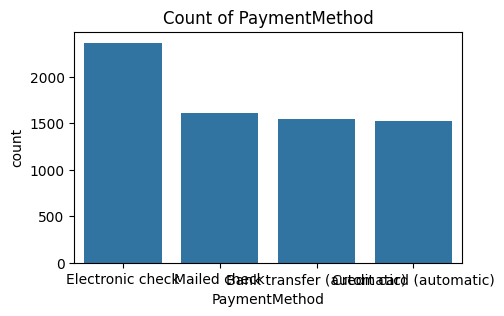

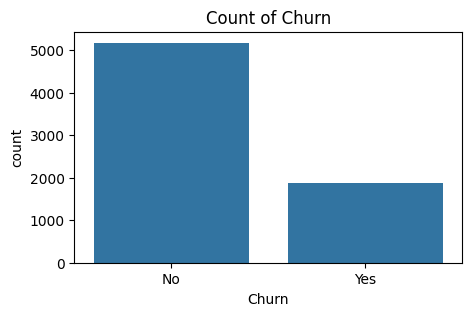

In [10]:
object_cols = ["SeniorCitizen"] + object_cols
for col in object_cols:
    plt.figure(figsize=(5, 3))
    sns.countplot(data=customer, x=col)
    plt.title(f'Count of {col}')
    plt.show()

### 4. Data Preprocessing


In [11]:
customer["Churn"] = customer["Churn"].map({"Yes": 1, "No": 0})

object_cols = customer.select_dtypes(include='object').columns
encoders = {}
for column in object_cols:
    label_encoder = LabelEncoder()
    customer[column] = label_encoder.fit_transform(customer[column])
    encoders[column] = label_encoder

with open('./models/label_encoders.pkl', 'wb') as f:
    pickle.dump(encoders, f)

encoders

{'gender': LabelEncoder(),
 'Partner': LabelEncoder(),
 'Dependents': LabelEncoder(),
 'PhoneService': LabelEncoder(),
 'MultipleLines': LabelEncoder(),
 'InternetService': LabelEncoder(),
 'OnlineSecurity': LabelEncoder(),
 'OnlineBackup': LabelEncoder(),
 'DeviceProtection': LabelEncoder(),
 'TechSupport': LabelEncoder(),
 'StreamingTV': LabelEncoder(),
 'StreamingMovies': LabelEncoder(),
 'Contract': LabelEncoder(),
 'PaperlessBilling': LabelEncoder(),
 'PaymentMethod': LabelEncoder()}

In [12]:
customer.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [13]:
X = customer.drop(columns=["Churn"])
Y = customer["Churn"]

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#### SMOT

**Sythetic minority over-sampling technique (SMOTE)** là một kỹ thuật tăng cường dữ liệu dùng để xử lý vấn đề mất cân bằng dữ liệu. SMOTE tạo ra các mẫu nhỏ hơn bằng cách kết hợp các mẫu gần nhau của lớp thiểu số để tạo ra các mẫu mới.


In [14]:
smote = SMOTE(random_state=42)
X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)



### 5. Model Training
